In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing

In [30]:
pip install statsmodels

In [31]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [32]:
#read data
path ="/content/gdrive/MyDrive/Colab Notebooks/My_Data/airline_passenger_satisfaction.csv"
df = pd.read_csv(path, index_col=0)
df.head()

,Gender,Age,Customer Type,Type of Travel,Class,Flight Distance,Departure Delay,Arrival Delay,Departure and Arrival Time Convenience,Ease of Online Booking,...,On-board Service,Seat Comfort,Leg Room Service,Cleanliness,Food and Drink,In-flight Service,In-flight Wifi Service,In-flight Entertainment,Baggage Handling,Satisfaction
ID,,,,,,,,,,,,,,,,,,,,,
1,Male,48,First-time,Business,Business,821,2,5.0,3,3,...,3,5,2,5,5,5,3,5,5,Neutral or Dissatisfied
2,Female,35,Returning,Business,Business,821,26,39.0,2,2,...,5,4,5,5,3,5,2,5,5,Satisfied
3,Male,41,Returning,Business,Business,853,0,0.0,4,4,...,3,5,3,5,5,3,4,3,3,Satisfied
4,Male,50,Returning,Business,Business,1905,0,0.0,2,2,...,5,5,5,4,4,5,2,5,5,Satisfied
5,Female,49,Returning,Business,Business,3470,0,1.0,3,3,...,3,4,4,5,4,3,3,3,3,Satisfied


In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 129880 entries, 1 to 129880
Data columns (total 23 columns):
 #   Column                                  Non-Null Count   Dtype  
---  ------                                  --------------   -----  
 0   Gender                                  129880 non-null  object 
 1   Age                                     129880 non-null  int64  
 2   Customer Type                           129880 non-null  object 
 3   Type of Travel                          129880 non-null  object 
 4   Class                                   129880 non-null  object 
 5   Flight Distance                         129880 non-null  int64  
 6   Departure Delay                         129880 non-null  int64  
 7   Arrival Delay                           129487 non-null  float64
 8   Departure and Arrival Time Convenience  129880 non-null  int64  
 9   Ease of Online Booking                  129880 non-null  int64  
 10  Check-in Service                        129880 no

# I/ Explore data analysis

In [34]:
#data dimension
df.shape

(129880, 23)

In [35]:
#check data types
#df.info()

In [36]:
#check missing value
df.isnull().sum()

,0
Gender,0
Age,0
Customer Type,0
Type of Travel,0
Class,0
Flight Distance,0
Departure Delay,0
Arrival Delay,393
Departure and Arrival Time Convenience,0
Ease of Online Booking,0


In [37]:
# only Arrival Delay has 393 missing values, which is only a minor part of the data, so they are dropped
df.dropna(inplace=True)


['Neutral or Dissatisfied' 'Satisfied']


Text(0.5, 1.0, 'neutral or dissatisfied(0), satisfied (1)')

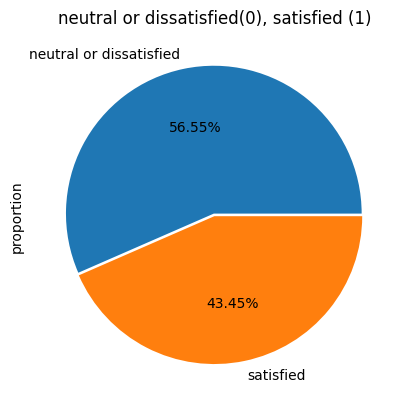

In [38]:
#checking for imbalance of the target variable : Satisfaction
#convert to binary class for Satisfaction: neutral or dissatisfied(0), satisfied (1)
le = preprocessing.LabelEncoder()
le.fit(df.Satisfaction)
print(le.classes_)
df.Satisfaction = le.transform(df.Satisfaction)
#plot data
satis_count = df['Satisfaction'].value_counts('normalized')
ax = satis_count.plot(kind='pie', explode=(0.018,0), labels=['neutral or dissatisfied','satisfied'], autopct='%1.2f%%')
# set the title
ax.set_title('neutral or dissatisfied(0), satisfied (1)')

**We can see that 43.45% of the customer satisfied with the flight service while the remain 56.55% tent to feel neutral or dissatisfied with the service**

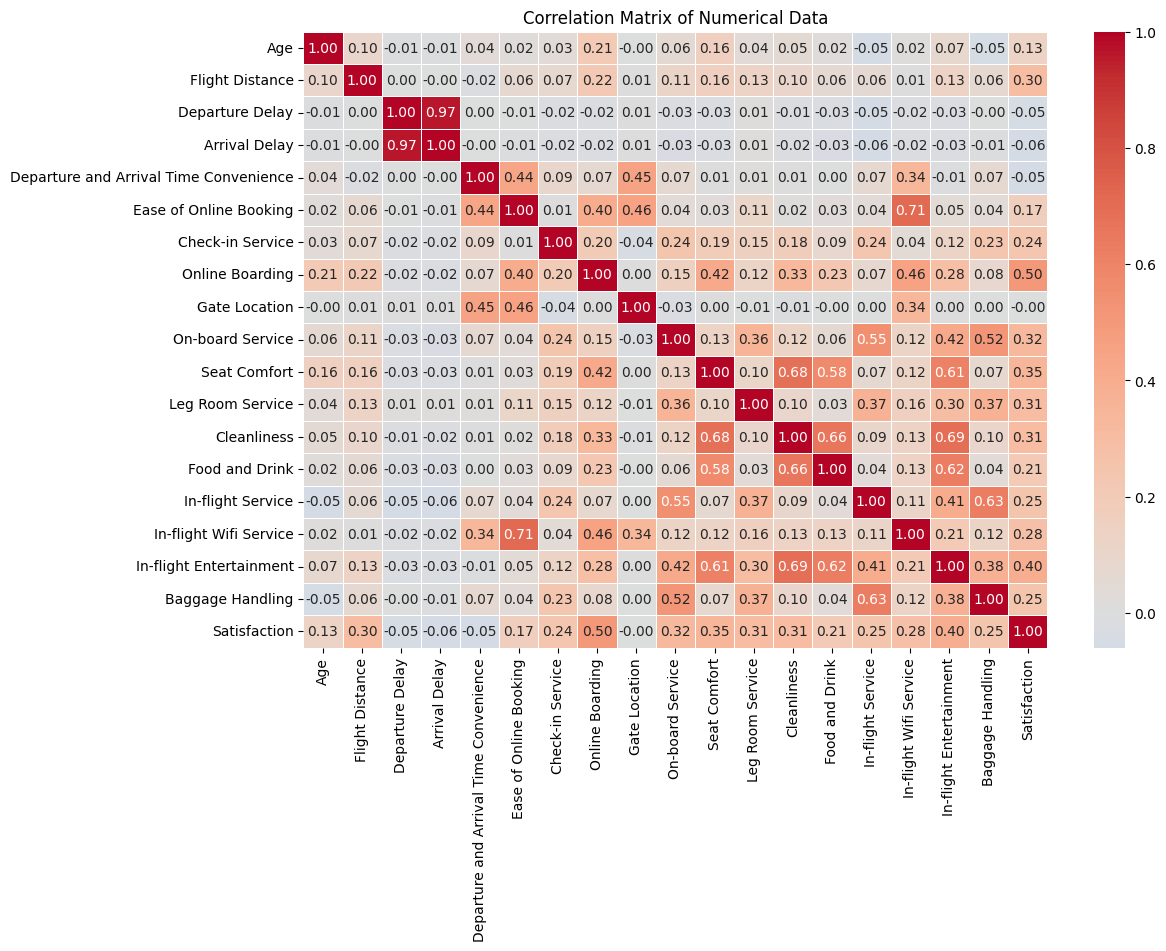

In [39]:
#correlation plot

# Selecting only numerical columns from the DataFrame
numerical_data = df.select_dtypes(include=['number'])

# Calculating the correlation matrix
correlation_matrix = numerical_data.corr()

# Plotting the correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, fmt='.2f', linewidths=0.5)
plt.title("Correlation Matrix of Numerical Data")
plt.show()

In [40]:
#Since Departure Delay and Arrival delay has high correlation score (0.97), we have to check for collinearity
#Method 1: Check by Z-test
from statsmodels.stats.weightstats import ztest
z_statistic, p_value = ztest(df['Departure Delay'], df['Arrival Delay'])

print(f"Z-statistic: {z_statistic}, P-value: {p_value}")


Z-statistic: -2.982374414813736, P-value: 0.002860219674711084


**P-value=0.00286 < 0.05 ,we reject the null hypothesis and conclude that there is a statistically significant difference between the means of 'Departure Delay' and 'Arrival Delay**

In [41]:
#drop arrival delay
df = df.drop('Arrival Delay', axis=1)


**The VIF results for "Departure Delay" and "Arrival Delay" indicate significant multicollinearity between these two variables, with VIF values far exceeding the common thresholds of 5 or 10. This suggests that these variables share a high degree of linear dependency, which could complicate the interpretation of their individual effects**

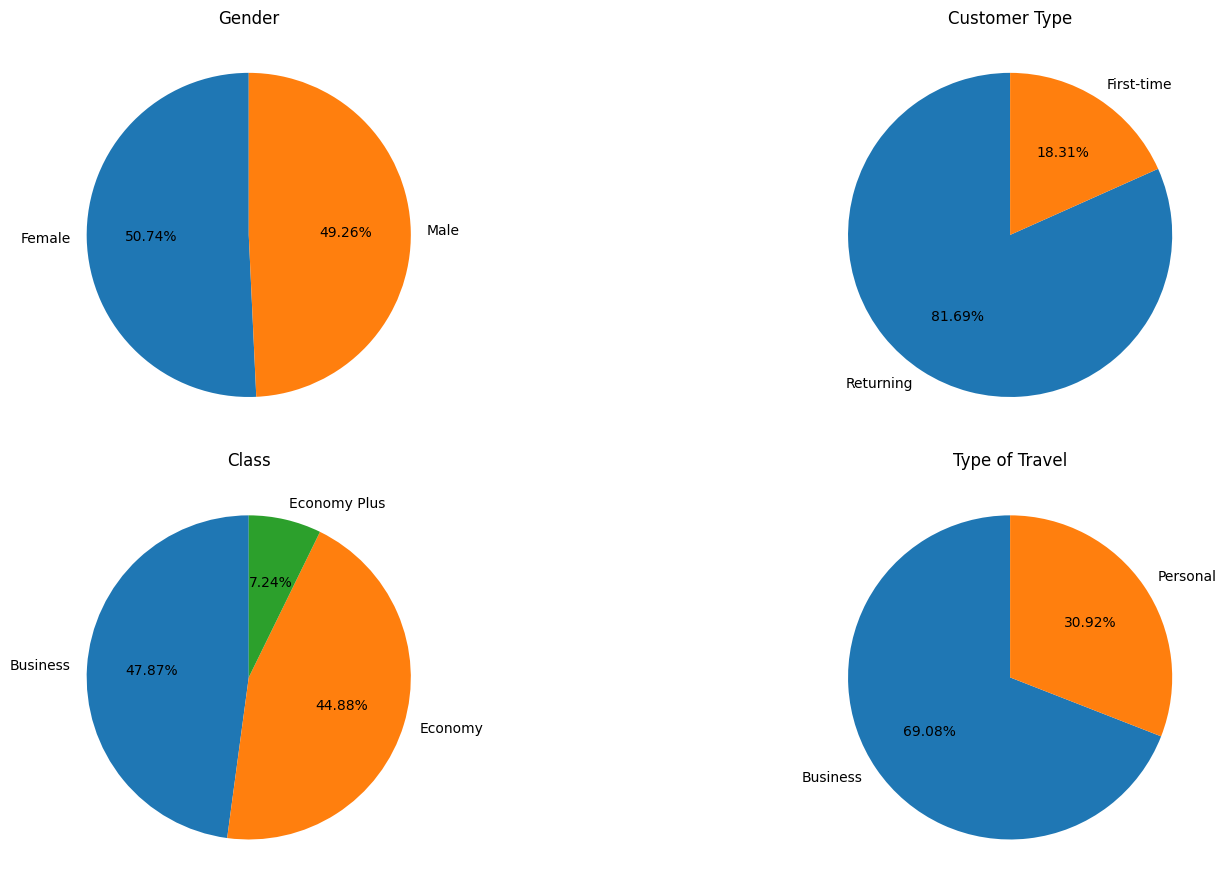

In [42]:
#Explore object data
#Including 4 features: Gender, Customer Type, Class, Type of Travel
fig, ([ax1, ax2],[ax3, ax4]) = plt.subplots(2, 2,figsize=(18, 9))
# plot each pie chart in a separate subplot
ax1.pie(df['Gender'].value_counts('normalized'), autopct='%1.2f%%', labels=df['Gender'].value_counts('normalized').index,startangle = 90)
ax1.set_title('Gender')
ax2.pie(df['Customer Type'].value_counts('normalized'), autopct='%1.2f%%',labels=df['Customer Type'].value_counts('normalized').index,startangle = 90)
ax2.set_title('Customer Type')
ax3.pie(df['Class'].value_counts('normalized'), autopct='%1.2f%%', labels=df['Class'].value_counts('normalized').index,startangle = 90)
ax3.set_title('Class')
ax4.pie(df['Type of Travel'].value_counts('normalized'), autopct='%1.2f%%',labels=df['Type of Travel'].value_counts('normalized').index,startangle = 90)
ax4.set_title('Type of Travel')
plt.tight_layout()

In [43]:
#encode the data to convert text to integer
# Encode gender
le.fit(df['Gender'])
df['Gender'] = le.transform(df['Gender'])
# Encode customer type
le.fit(df['Customer Type'])
df['Customer Type'] = le.transform(df['Customer Type'])
# Encode class
le.fit(df['Class'])
df['Class'] = le.transform(df['Class'])
# Encode type of travel
le.fit(df['Type of Travel'])
df['Type of Travel'] = le.transform(df['Type of Travel'])

<ipython-input-44-db39edd126e5>:14: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Departure Delay'], ax=ax3)
<ipython-input-44-db39edd126e5>:17: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Flight Distance'], ax=ax4)


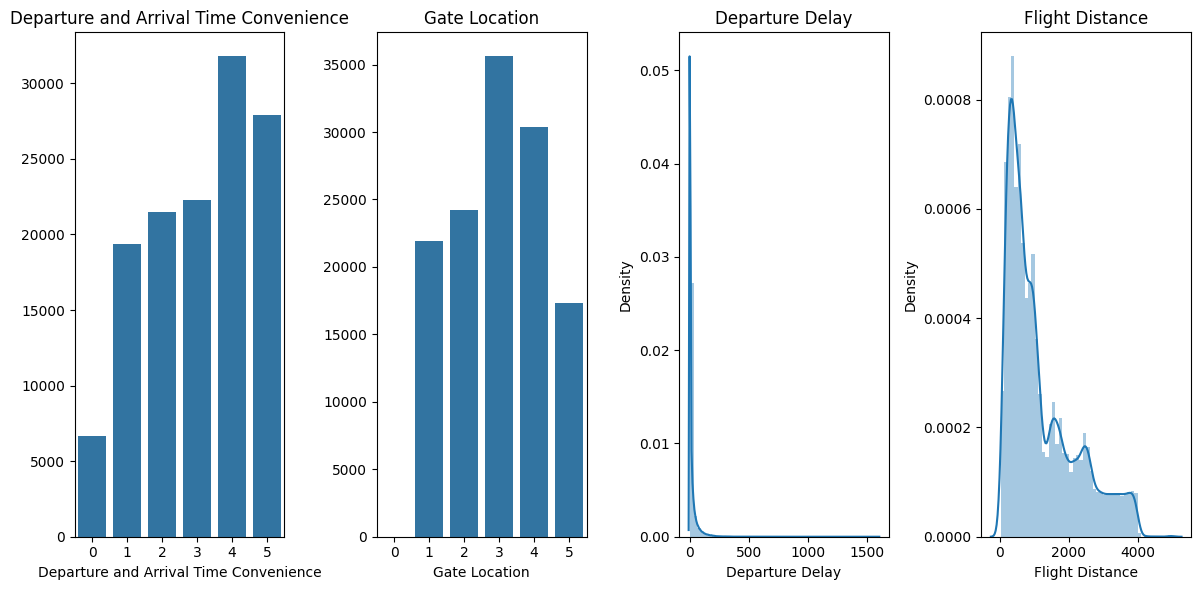

In [44]:
# explore numerical data
# create a figure with 4 subplots
fig, ((ax1, ax2, ax3, ax4)) = plt.subplots(1, 4, figsize=(12, 6))


sns.barplot(x=df['Departure and Arrival Time Convenience'].value_counts().index,
            y=df['Departure and Arrival Time Convenience'].value_counts().values, ax=ax1)
ax1.set_title('Departure and Arrival Time Convenience')

sns.barplot(x=df['Gate Location'].value_counts().index,
            y=df['Gate Location'].value_counts().values, ax=ax2)
ax2.set_title('Gate Location')

sns.distplot(df['Departure Delay'], ax=ax3)
ax3.set_title('Departure Delay')

sns.distplot(df['Flight Distance'], ax=ax4)
ax4.set_title('Flight Distance')

plt.tight_layout()
plt.show()

<ipython-input-45-6cd257d74a55>:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df.loc[df["Satisfaction"]==1]["Age"],alpha=0.5,label="satisfied",shade=True)
<ipython-input-45-6cd257d74a55>:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df.loc[df["Satisfaction"]==0]["Age"],alpha=0.5,label="neutral or dissatisfied",shade=True)
<ipython-input-45-6cd257d74a55>:9: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df.loc[df["Satisfaction"]==1]["Flight Distance"],alpha=0.5,label="satisfied",shade=True)
<ipython-input-45-6cd257d74a55>:10: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This wil

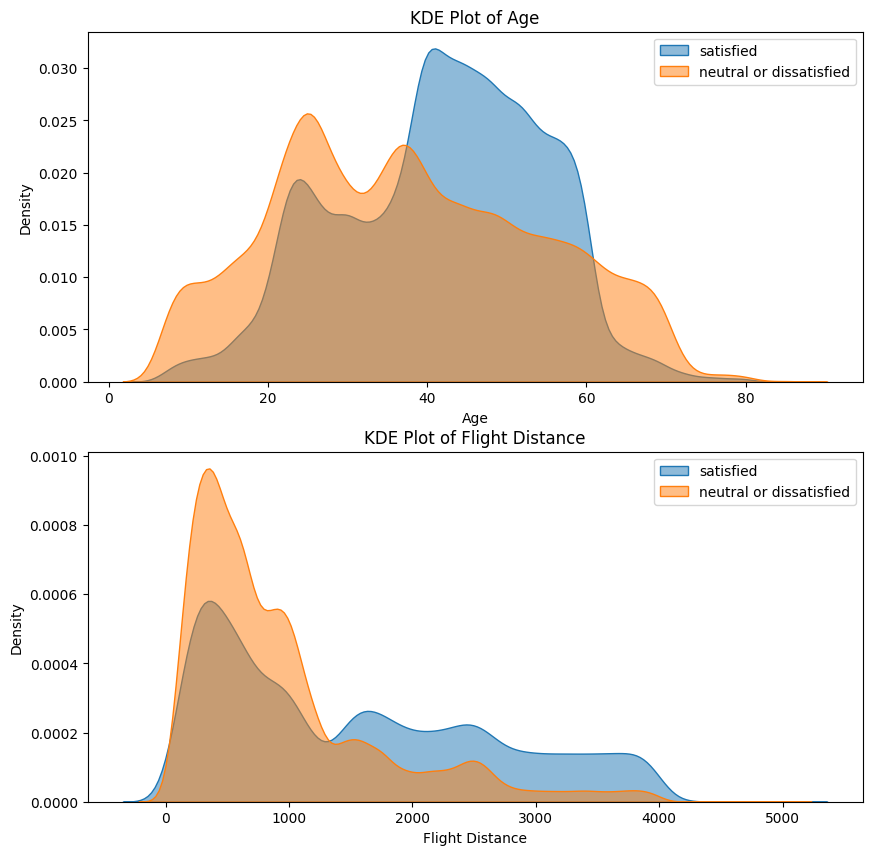

In [45]:
plt.figure(figsize=(10,10))
plt.subplot(2,1,1)
sns.kdeplot(df.loc[df["Satisfaction"]==1]["Age"],alpha=0.5,label="satisfied",shade=True)
sns.kdeplot(df.loc[df["Satisfaction"]==0]["Age"],alpha=0.5,label="neutral or dissatisfied",shade=True)
plt.title("KDE Plot of Age")
plt.legend()

plt.subplot(2,1,2)
sns.kdeplot(df.loc[df["Satisfaction"]==1]["Flight Distance"],alpha=0.5,label="satisfied",shade=True)
sns.kdeplot(df.loc[df["Satisfaction"]==0]["Flight Distance"],alpha=0.5,label="neutral or dissatisfied",shade=True)
plt.title("KDE Plot of Flight Distance")
plt.legend()

* Older customer seems easier on the review than the youth.
* Interesting point is that long flight customer satisfied more than short flight. Most of the bad review comes from flight distance less than 1500km. We could divide flight distance into short and and long distance flight instead of using the number.

<ipython-input-46-ee7dd9501f2d>:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Departure Delay'], ax=ax1)
<ipython-input-46-ee7dd9501f2d>:13: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Flight Distance'], ax=ax2)


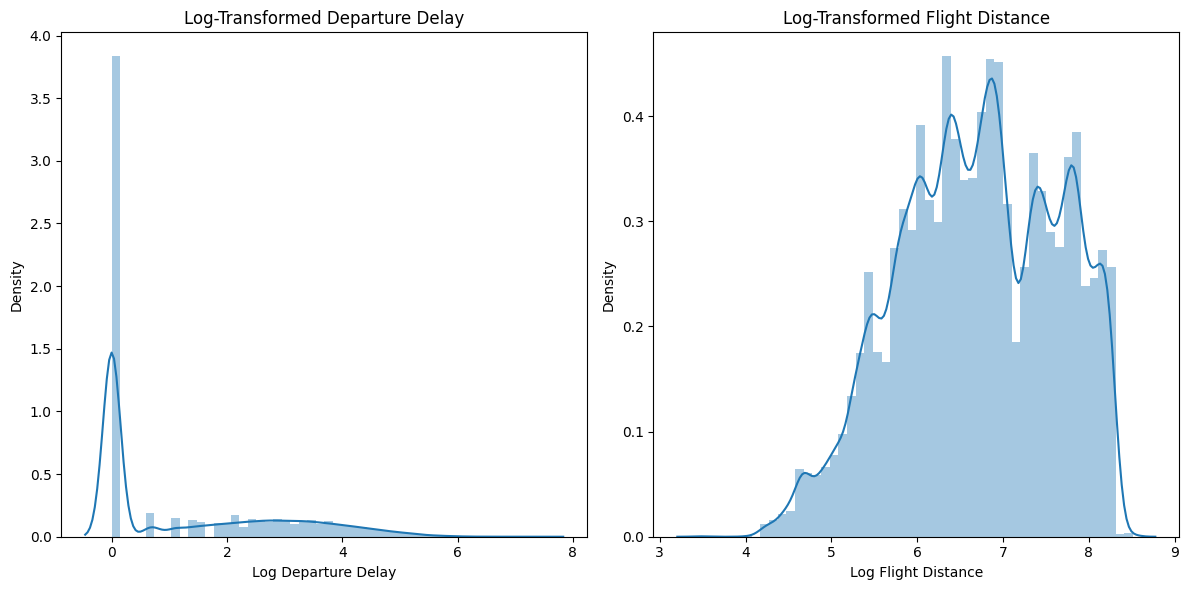

In [46]:
#since both Departure Delay and Flight Distance are heavily right skewed, the data needs to be transformed
df['Departure Delay'] = np.log(df['Departure Delay'] + 1)
df['Flight Distance'] = np.log(df['Flight Distance'] + 1)


fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

sns.distplot(df['Departure Delay'], ax=ax1)
ax1.set_title('Log-Transformed Departure Delay')
ax1.set_xlabel('Log Departure Delay')
ax1.set_ylabel('Density')

sns.distplot(df['Flight Distance'], ax=ax2)
ax2.set_title('Log-Transformed Flight Distance')
ax2.set_xlabel('Log Flight Distance')
ax2.set_ylabel('Density')

plt.tight_layout()
plt.show()

In [47]:

from scipy.stats import chi2_contingency



# List of categorical columns, excluding 'Flight Distance', 'Departure Delay', 'Arrival Delay', and 'Satisfaction'
categorical_columns = [col for col in df.columns if col not in ['Flight Distance', 'Departure Delay','Satisfaction']]

# Dictionary to hold the p-values of the Chi-square tests
chi_square_results = {}

# Perform Chi-square test for each categorical variable against 'Satisfaction'
for col in categorical_columns:
    contingency_table = pd.crosstab(df[col], df['Satisfaction'])
    chi2, p, dof, expected = chi2_contingency(contingency_table)
    chi_square_results[col] = p

# Printing the p-values
for col, p in chi_square_results.items():
    print(f"Variable: {col}, P-value: {p}")


Variable: Gender, P-value: 3.608854694610591e-05
Variable: Age, P-value: 0.0
Variable: Customer Type, P-value: 0.0
Variable: Type of Travel, P-value: 0.0
Variable: Class, P-value: 0.0
Variable: Departure and Arrival Time Convenience, P-value: 2.473802119547831e-127
Variable: Ease of Online Booking, P-value: 0.0
Variable: Check-in Service, P-value: 0.0
Variable: Online Boarding, P-value: 0.0
Variable: Gate Location, P-value: 0.0
Variable: On-board Service, P-value: 0.0
Variable: Seat Comfort, P-value: 0.0
Variable: Leg Room Service, P-value: 0.0
Variable: Cleanliness, P-value: 0.0
Variable: Food and Drink, P-value: 0.0
Variable: In-flight Service, P-value: 0.0
Variable: In-flight Wifi Service, P-value: 0.0
Variable: In-flight Entertainment, P-value: 0.0
Variable: Baggage Handling, P-value: 0.0


**Based on the p-values from the Chi-square tests, it is evident that all examined categorical variables have a statistically significant association with the 'Satisfaction' variable. This indicates that factors ranging from 'Gender' to 'Baggage Handling' potentially play a role in influencing customer satisfaction levels. The strength of these associations is robust, given the extremely low p-values, suggesting that these variables are important to consider when modeling customer satisfaction in logistic regression analysis.**






##II/ Modeling

a/ Prepare data for modelling

In [48]:
df = df.reset_index(drop=True)

from sklearn.model_selection import train_test_split
X = df.drop("Satisfaction",axis=1)
y = df["Satisfaction"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
print(X_train.shape)
print(X_test.shape)

(90640, 21)
(38847, 21)


b/ Logistic Regression

In [49]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
lr = LogisticRegression(solver='liblinear')
lr.fit(X_train,y_train)
y_pred= lr.predict(X_test)
print("Accuracy:",accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))
print(lr)

Accuracy: 0.8739671017066954
              precision    recall  f1-score   support

           0       0.88      0.90      0.89     21868
           1       0.87      0.84      0.85     16979

    accuracy                           0.87     38847
   macro avg       0.87      0.87      0.87     38847
weighted avg       0.87      0.87      0.87     38847

LogisticRegression(solver='liblinear')


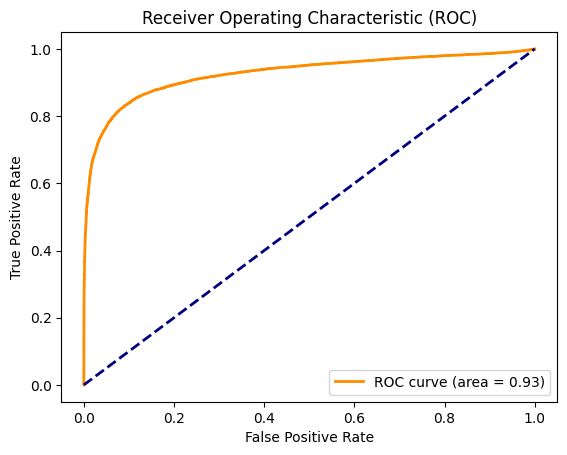

In [50]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Calculate the ROC curve and AUC for the model
fpr, tpr, thresholds = roc_curve(y_test, lr.predict_proba(X_test)[:,1])
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()


c/ Decision Tree

In [51]:
from sklearn.tree import DecisionTreeClassifier,plot_tree # Import Decision Tree Classifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

tree = DecisionTreeClassifier(max_depth=4)
tree.fit(X_train,y_train)
y_pred= tree.predict(X_test)
print("Accuracy:",accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

Accuracy: 0.8878420470049168
              precision    recall  f1-score   support

           0       0.88      0.93      0.90     21868
           1       0.90      0.84      0.87     16979

    accuracy                           0.89     38847
   macro avg       0.89      0.88      0.89     38847
weighted avg       0.89      0.89      0.89     38847

Confusion Matrix:
[[20281  1587]
 [ 2770 14209]]


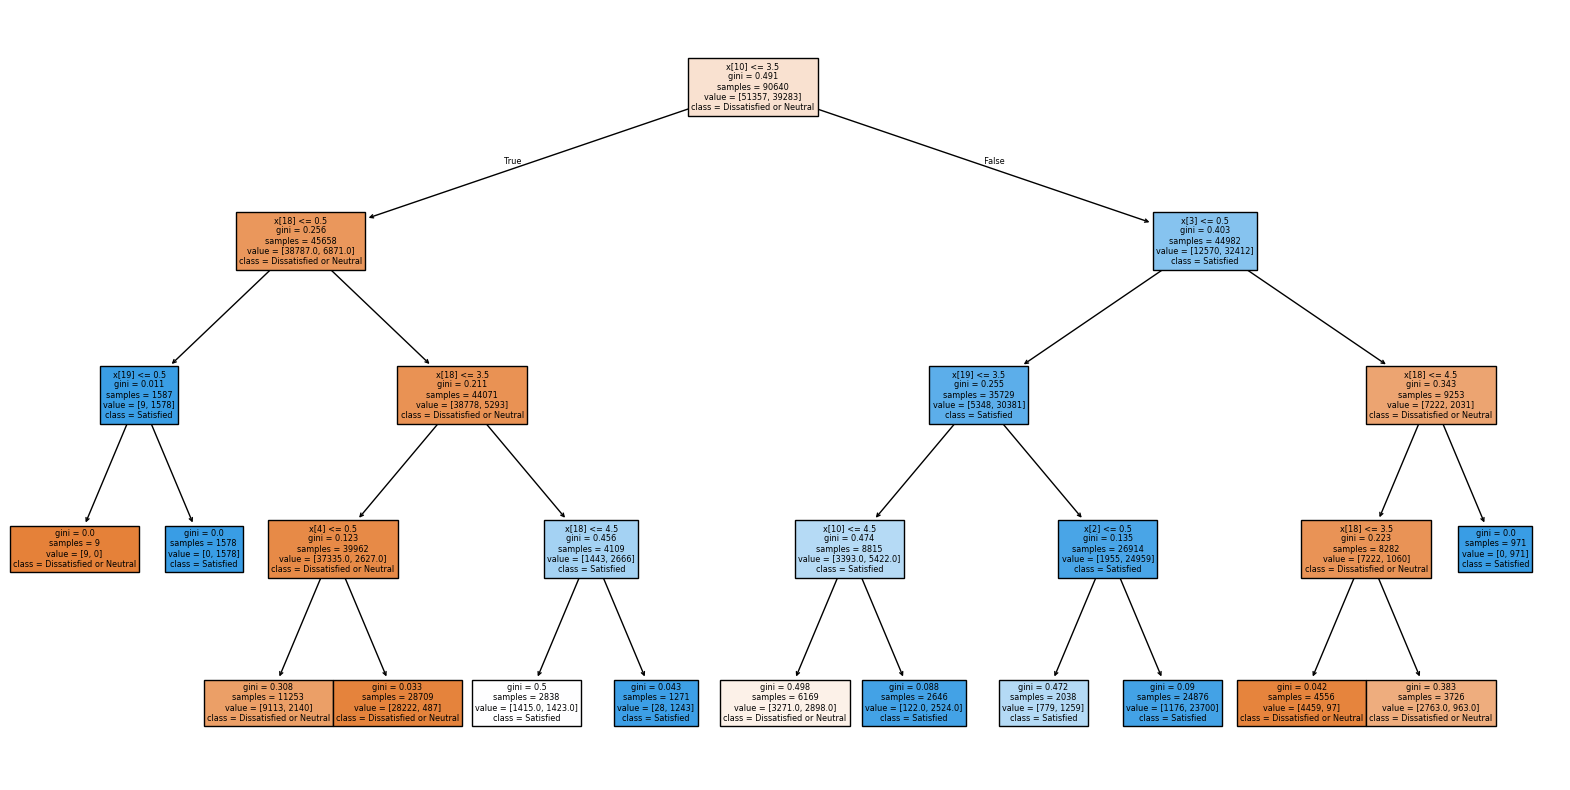

In [54]:
plt.figure(figsize=(20, 10))
plot_tree(tree, filled=True, class_names=['Dissatisfied or Neutral','Satisfied'])
plt.show()

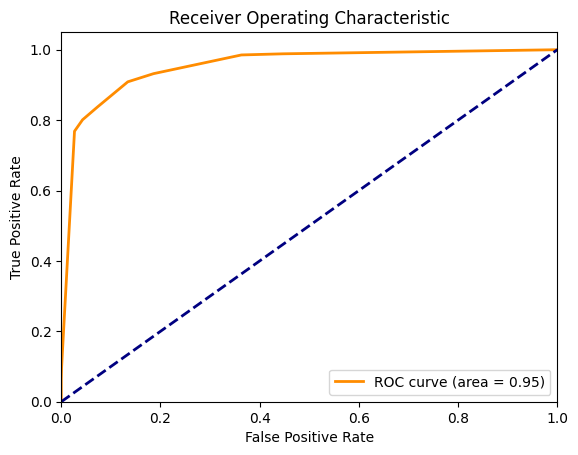

In [55]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Compute ROC curve and ROC area
fpr, tpr, thresholds = roc_curve(y_test, tree.predict_proba(X_test)[:, 1])
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()


In [56]:
# Importannce features for decision tree using gini importance index
importances = tree.feature_importances_
original_feature_names = X_train.columns

# Update feature_names to use the original feature names
feature_names = [original_feature_names[i] for i in range(X_train.shape[1])]

sorted_indices = importances.argsort()[::-1]
for i in sorted_indices:
    print(f"{feature_names[i]}: {importances[i]:.4f}")


Online Boarding: 0.5115
In-flight Wifi Service: 0.2239
Type of Travel: 0.1918
In-flight Entertainment: 0.0431
Class: 0.0159
Customer Type: 0.0139
Ease of Online Booking: 0.0000
Age: 0.0000
Flight Distance: 0.0000
Departure Delay: 0.0000
Departure and Arrival Time Convenience: 0.0000
Baggage Handling: 0.0000
Check-in Service: 0.0000
Gate Location: 0.0000
On-board Service: 0.0000
Seat Comfort: 0.0000
Leg Room Service: 0.0000
Cleanliness: 0.0000
Food and Drink: 0.0000
In-flight Service: 0.0000
Gender: 0.0000
